In [1]:
from datetime import datetime
import os
import sys
sys.path.insert(0, '../../RISClusterPT/')

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image
from RISCluster.processing import cluster
from RISCluster.processing.cluster import load_data, set_loading_index
from RISCluster.utils.utils import notify

In [15]:
fname_dataset = '../../../Data/DetectionData.h5'
M = int(1000)
M_train = int(0.8 * M)
M_val = int(0.2 * M)
M_test = M
LR = 0.0001     # Learning rate
N_EPOCHS = 100  # Number of epochs
BATCH_SZ = 128  # Batch size

index_train, index_val, index_test = set_loading_index(M, fname_dataset, reserve=0.02)
X_train, m, p, n, o, idx_smpl_train = load_data(fname_dataset, M_train, index_train)
X_val, m, p, n, o, idx_smpl_val = load_data(fname_dataset, M_val, index_val)
X_test, m, p, n, o, idx_smpl_test = load_data(fname_dataset, M_test, index_test)

--------------------------------------------------------------
H5 file has 5113 samples, 66 frequency bins, 301 time bins.
Loading 800 samples...
100.00% complete.
Time elapsed = 2020-07-15 10:37:17.280816
Shape of output is (800, 1, 64, 128)
--------------------------------------------------------------
--------------------------------------------------------------
H5 file has 5113 samples, 66 frequency bins, 301 time bins.
Loading 200 samples...
100.00% complete.
Time elapsed = 2020-07-15 10:37:17.393440
Shape of output is (200, 1, 64, 128)
--------------------------------------------------------------
--------------------------------------------------------------
H5 file has 5113 samples, 66 frequency bins, 301 time bins.
Loading 1000 samples...
100.00% complete.
Time elapsed = 2020-07-15 10:37:17.864579
Shape of output is (1000, 1, 64, 128)
--------------------------------------------------------------


In [16]:
model = cluster.ConvAEC()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available() is True:
    print('CUDA device available, using GPU.') 
else:
    print('CUDA device not available, using CPU.') 
# model = ConvAEC().to(device)

CUDA device not available, using CPU.


In [17]:
model(X_train).size()

torch.Size([800, 1, 64, 128])

torch.Size([1, 64, 128])
torch.Size([1, 64, 128])
torch.Size([1, 64, 128])
torch.Size([1, 64, 128])


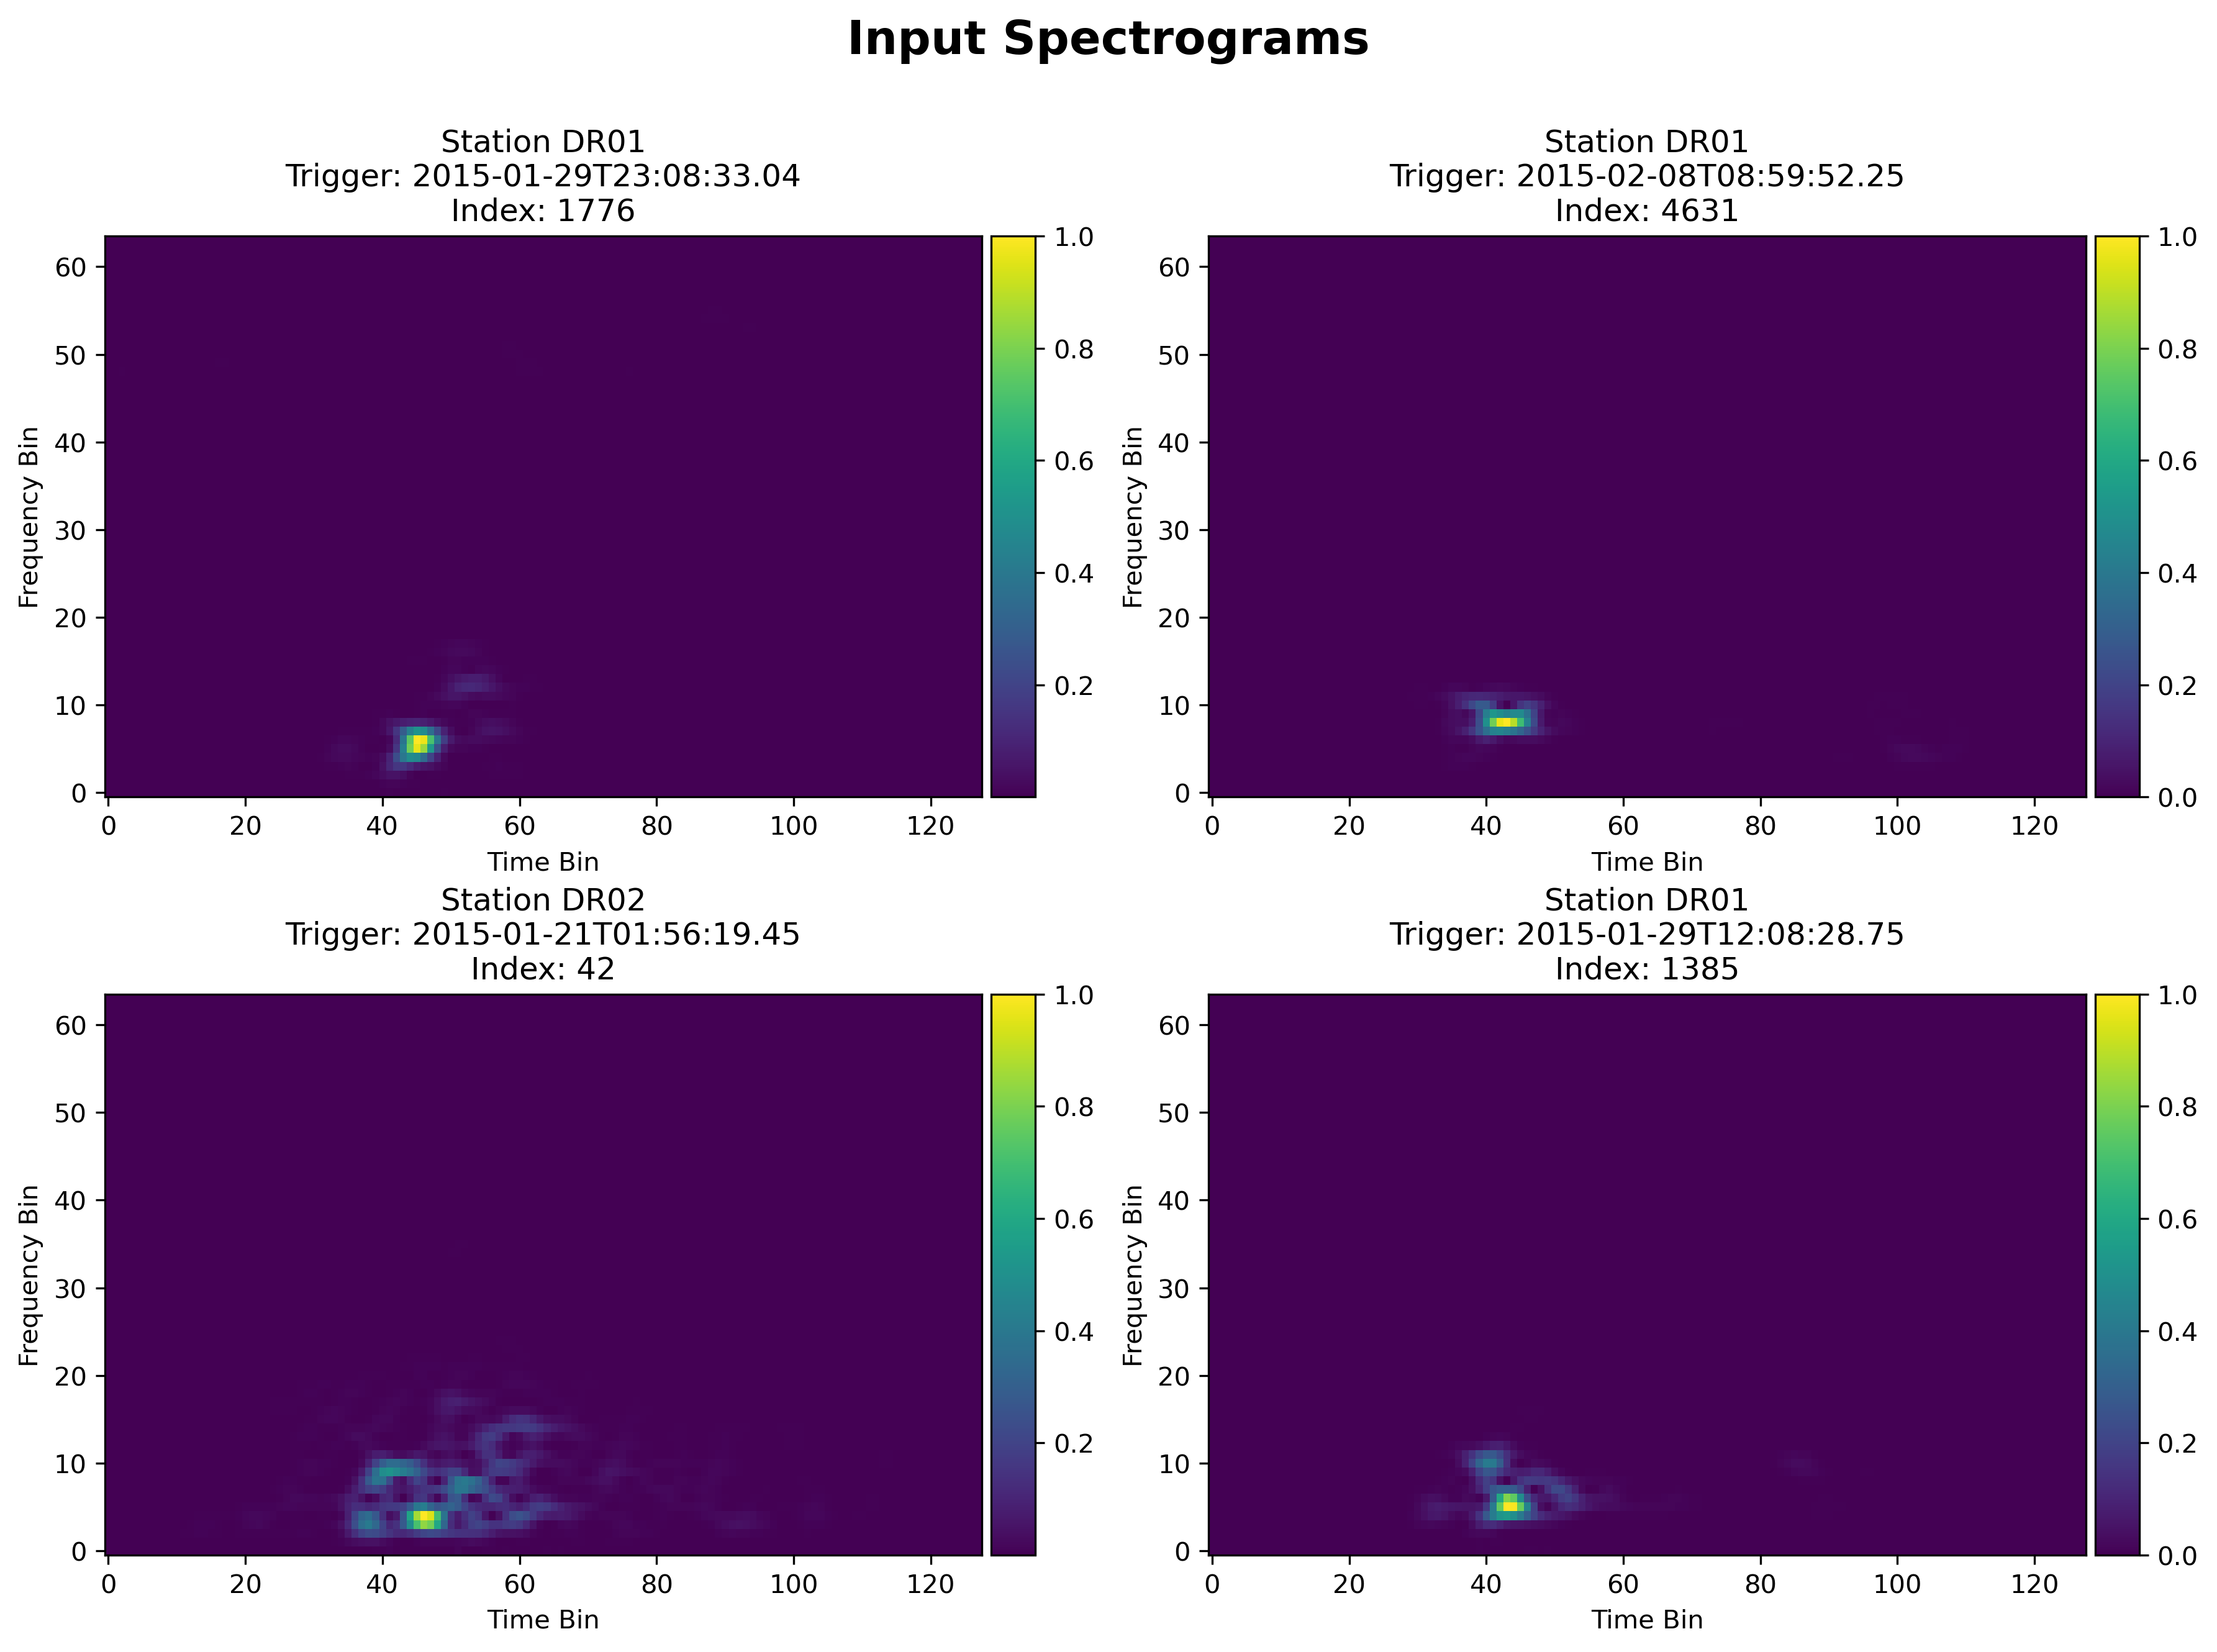

In [20]:
import importlib
importlib.reload(cluster)
insp_idx = sorted(np.random.randint(0,len(X_train),4))

figtitle = 'Input Spectrograms'
fig = cluster.view_specgram(X_train, insp_idx, n, o, fname_dataset, idx_smpl_train,
                            figtitle, nrows=2, ncols=2, figsize=(12,9),
                            show=True)


# writer = SummaryWriter('test_tensorboard')